# Explore here

In [1]:
import pandas as pd
# Your code here
#Lectura de datos
df = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/data-preprocessing-project-tutorial/main/AB_NYC_2019.csv')
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [10]:
df.to_csv('../data/raw/raw.csv', index=False) #Guardado de datos, sin indice

In [24]:
df.shape #Explorar datos, ver forma
df.info
df.columns


Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [20]:
print(df['name'].duplicated().sum()) #Revision de duplicados por columna
print(df['host_id'].duplicated().sum()) #con cada columna
print(df['latitude'].duplicated().sum()) #con cada columna

989
11438
29847


In [25]:
df.drop(['id','name','host_id','host_name','last_review','reviews_per_month'],axis=1,inplace=True) #Eliminar columnas con datos irrelevantes
df.head()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,6,365
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2,355
2,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,1,365
3,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,1,194
4,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,1,0


[]

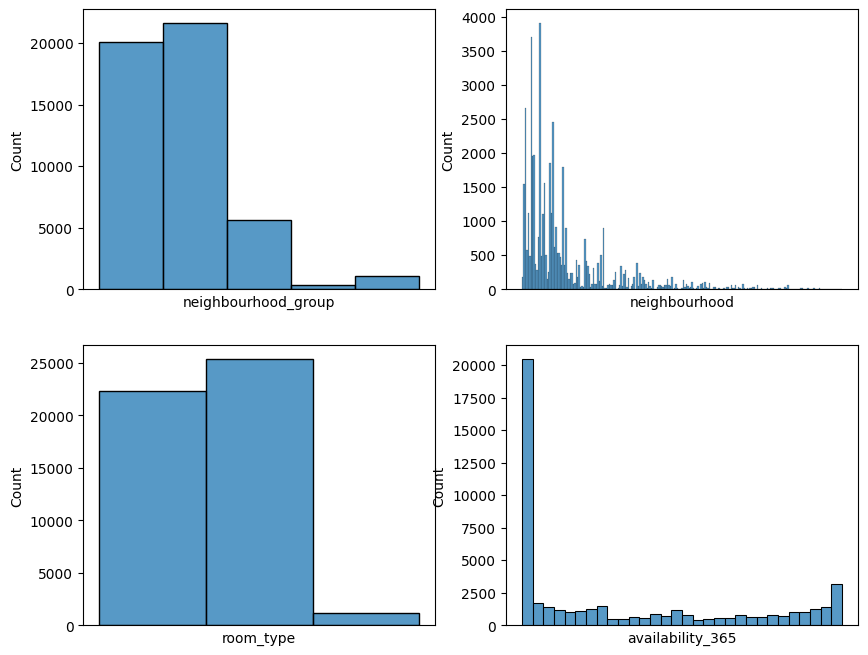

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
#Graficar variables categoricas
fig,axis = plt.subplots(2, 2, figsize=(10,8)) #Graficar variables segun cantidad de variables

sns.histplot(ax=axis[0,0],data=df,x='neighbourhood_group').set_xticks([]) #set_xticks([]) elimina las etiquetas del eje x
sns.histplot(ax=axis[0,1],data=df,x='neighbourhood').set_xticks([])
sns.histplot(ax=axis[1,0],data=df,x='room_type').set_xticks([])
sns.histplot(ax=axis[1,1],data=df,x='availability_365').set_xticks([])




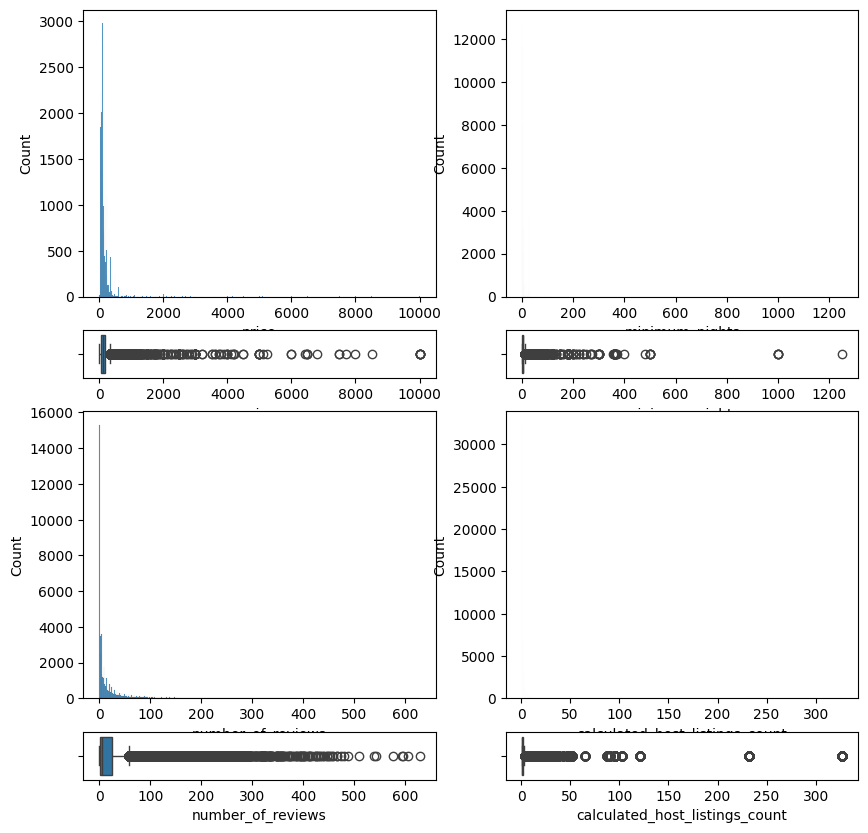

In [37]:
fig,axis = plt.subplots(4,2,figsize=(10,10),gridspec_kw={'height_ratios':[6,1,6,1]})
#Graficar variables numericas
sns.histplot(ax=axis[0,0],data=df,x='price') #Histograma
sns.boxplot(ax=axis[1,0],data=df,x='price')  #Caja de bigote

sns.histplot(ax=axis[0,1],data=df,x='minimum_nights')
sns.boxplot(ax=axis[1,1],data=df,x='minimum_nights')

sns.histplot(ax=axis[2,0],data=df,x='number_of_reviews')
sns.boxplot(ax=axis[3,0],data=df,x='number_of_reviews')

sns.histplot(ax=axis[2,1],data=df,x='calculated_host_listings_count')
sns.boxplot(ax=axis[3,1],data=df,x='calculated_host_listings_count')

plt.show()

AttributeError: 'list' object has no attribute 'plot'

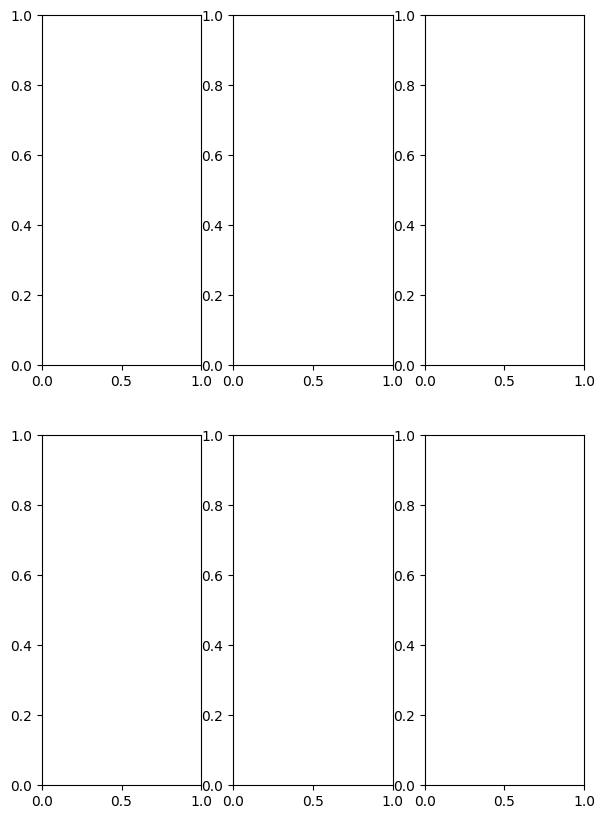

In [42]:
#Analisis multivariante: Numerico-Numerico
# Variable objetivo: precio
fig,axis = plt.subplots(2,3,figsize=(7,10))

sns.regplot(ax=[0,0],data=df,x='minimum_nights',y='price')                                              #Grafico de regresion
sns.heatmap(df[['minimum_nights','price']].corr(),fmt='.2f',ax=axis[1,0],cbar=False,annot=True)         #Grafico caja/bigote

sns.regplot(ax=[0,0],data=df,x='number_of_reviews',y='price')
sns.heatmap(df[['number_of_reviews','price']].corr(),fmt='.2f',ax=axis[1,0],cbar=False,annot=True)

sns.regplot(ax=[0,0],data=df,x='calculated_host_listings_count',y='price')
sns.heatmap(df[['calculated_host_listings_count','price']].corr(),fmt='.2f',ax=axis[1,0],cbar=False,annot=True)

plt.show()